# PTS2019 - AstroPy: Working with images

This notebook is part of the Python Tutorial Series presented in the Gemini Observatory. It will contain the basics on how to load FITS Images using AstroPy and how to perform basic data analysis using `photutils` and `imexam`.

Here is the table of contents:

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#FITS-I/O" data-toc-modified-id="FITS-I/O-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>FITS I/O</a></span><ul class="toc-item"><li><span><a href="#fits.getdata()" data-toc-modified-id="fits.getdata()-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><code>fits.getdata()</code></a></span></li><li><span><a href="#fits.getheader()" data-toc-modified-id="fits.getheader()-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><code>fits.getheader()</code></a></span></li><li><span><a href="#fits.open()" data-toc-modified-id="fits.open()-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><code>fits.open()</code></a></span></li></ul></li><li><span><a href="#Image-Display" data-toc-modified-id="Image-Display-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Image Display</a></span><ul class="toc-item"><li><span><a href="#astropy.visualization" data-toc-modified-id="astropy.visualization-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><code>astropy.visualization</code></a></span></li><li><span><a href="#Working-with-masks-and-bad-data" data-toc-modified-id="Working-with-masks-and-bad-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Working with masks and bad data</a></span></li><li><span><a href="#Masked-data-and-image-normalization" data-toc-modified-id="Masked-data-and-image-normalization-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Masked data and image normalization</a></span></li><li><span><a href="#Display-Images-with-WCS" data-toc-modified-id="Display-Images-with-WCS-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Display Images with WCS</a></span></li></ul></li><li><span><a href="#imexam" data-toc-modified-id="imexam-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>imexam</a></span></li><li><span><a href="#PhotUtils" data-toc-modified-id="PhotUtils-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>PhotUtils</a></span><ul class="toc-item"><li><span><a href="#Basic-Statistics" data-toc-modified-id="Basic-Statistics-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Basic Statistics</a></span></li><li><span><a href="#Detect-Sources-with-DAOStarFinder" data-toc-modified-id="Detect-Sources-with-DAOStarFinder-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Detect Sources with DAOStarFinder</a></span></li><li><span><a href="#Detect-Sources-with-IRAFStarFinder" data-toc-modified-id="Detect-Sources-with-IRAFStarFinder-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Detect Sources with IRAFStarFinder</a></span></li></ul></li></ul></div>

The Astropy Project is a community effort to develop a common core package for Astronomy in Python and foster an ecosystem of interoperable astronomy packages. 

## FITS I/O

FITS input/output can be done easily using `astropy`. First, load the `fits` module from the `astropy.io` package:

In [1]:
from astropy.io import fits

### `fits.getdata()`

If your data has a single extension (single data array), you can load it into python simply using `fits.getdata()`. If your data has more than one data array, `fits.getdata()` will return the first data array within the file.

You should have a numpy array if the data is loaded correctly:

In [2]:
data = fits.getdata("data/simple_image.fits")
print(data.__class__)

<class 'numpy.ndarray'>


In [3]:
print(data.shape)

(2149, 3245)


### `fits.getheader()`

Metadata are stored within FITS files using Header. The easiest way to load a Header in python is using `fits.getheader()`:

In [4]:
header = fits.getheader("data/simple_image.fits")
print(header.__class__)

<class 'astropy.io.fits.header.Header'>


Header objets work like dictionaries: they contain pairs of key-values that can be access using strings has keys:

In [5]:
print(header["INSTRUME"])

GMOS-S


You can retrieve the list of keys using the `header.keys()` method. This method is actually a generator and needs to be interated. If you simply want to print the outputs, you have to convert it into a list like the example below:

In [6]:
print(list(header.keys())[:5])

['SIMPLE', 'BITPIX', 'NAXIS', 'EXTEND', 'COMMENT']


### `fits.open()`

This is the most complete way to open a FITS file and manipulate it. Loading a FITS like this will give you a `HDUList` (Header Data Unit List) object. Being a list, it supports indexing. 

In [7]:
hdul = fits.open("data/simple_image.fits")
print(hdul.__class__)

<class 'astropy.io.fits.hdu.hdulist.HDUList'>


A `HDUList` can contain different types of Header Data Units (HDU). You can check the structure of your data by using the `hdul.info()` method, as it it shown here:

In [8]:
hdul.info()

Filename: data/simple_image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     252   ()      
  1  SCI           1 ImageHDU       159   (3245, 2149)   float32   
  2  VAR           1 ImageHDU       159   (3245, 2149)   float32   
  3  DQ            1 ImageHDU       159   (3245, 2149)   int16 (rescales to uint16)   
  4  OBJMASK       1 ImageHDU       159   (3245, 2149)   uint8   
  5  OBJCAT        1 BinTableHDU    128   1756R x 43C   [J, E, E, D, D, D, D, D, D, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, I, J, J, E, J, E, E, E, E]   


The first column contains the index. That means that you can retrieve a Header Data Unit using `hdul[i]` where `i` is the index that corresponds to the desired HDU. The second column (`Name`) is the name of each Header Data Unit. The fourth column (`Type`) tells us what kind of Header Data Unit. The `Cards` column tells us how many key-value pairs we have in the metadata of the corresponding HDU. The `Dimensions` column describes the shape of the data, in the case of an `ImageHDU`, or the table, in the case of a `TableHDU` or `BinTableHDU`. Finally, the `Format` column shows the format of the data in the HDU or the data of each column of the `TableHDU`/`BinTableHDU`. 

The data above is a data processed with DRAGONS which merge the data from different amplifiers into the `SCI` `ImageHDU` and generates the other HDUs during the data reduction process. The `HDUList` of a raw data usually contains chunks of the data depending on the number of detectors and amplifiers. Here is an example:

In [9]:
hdul = fits.open("data/multi_extension_image.fits")

hdul.info()

Filename: data/multi_extension_image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     252   ()      
  1               -1 ImageHDU       324   (288, 2112)   int16 (rescales to uint16)   
  2               -1 ImageHDU       288   (288, 2112)   int16 (rescales to uint16)   
  3               -1 ImageHDU       252   (288, 2112)   int16 (rescales to uint16)   
  4               -1 ImageHDU       252   (288, 2112)   int16 (rescales to uint16)   
  5               -1 ImageHDU       216   (288, 2112)   int16 (rescales to uint16)   
  6               -1 ImageHDU       180   (288, 2112)   int16 (rescales to uint16)   
  7               -1 ImageHDU       180   (288, 2112)   int16 (rescales to uint16)   
  8               -1 ImageHDU       144   (288, 2112)   int16 (rescales to uint16)   
  9               -1 ImageHDU       108   (288, 2112)   int16 (rescales to uint16)   
 10               -1 ImageHDU       108   (288, 2112)   int16 (rescales

## Image Display

Since `astropy.io.fits` reads FITS files into numpy arrays, image display is fairy straightforward. Let us open our file again:

In [10]:
from astropy.io import fits

hdul = fits.open("data/simple_image.fits")

sci = hdul[1]  # Get data using HDU index
sci = hdul["SCI"]  # or get it using the HDU name

I recommend using `plt.subplots` to have more control on the figure and axes. There are simpler solutions but they might cause unnexpected behavior. Here is an example:

<IPython.core.display.Javascript object>


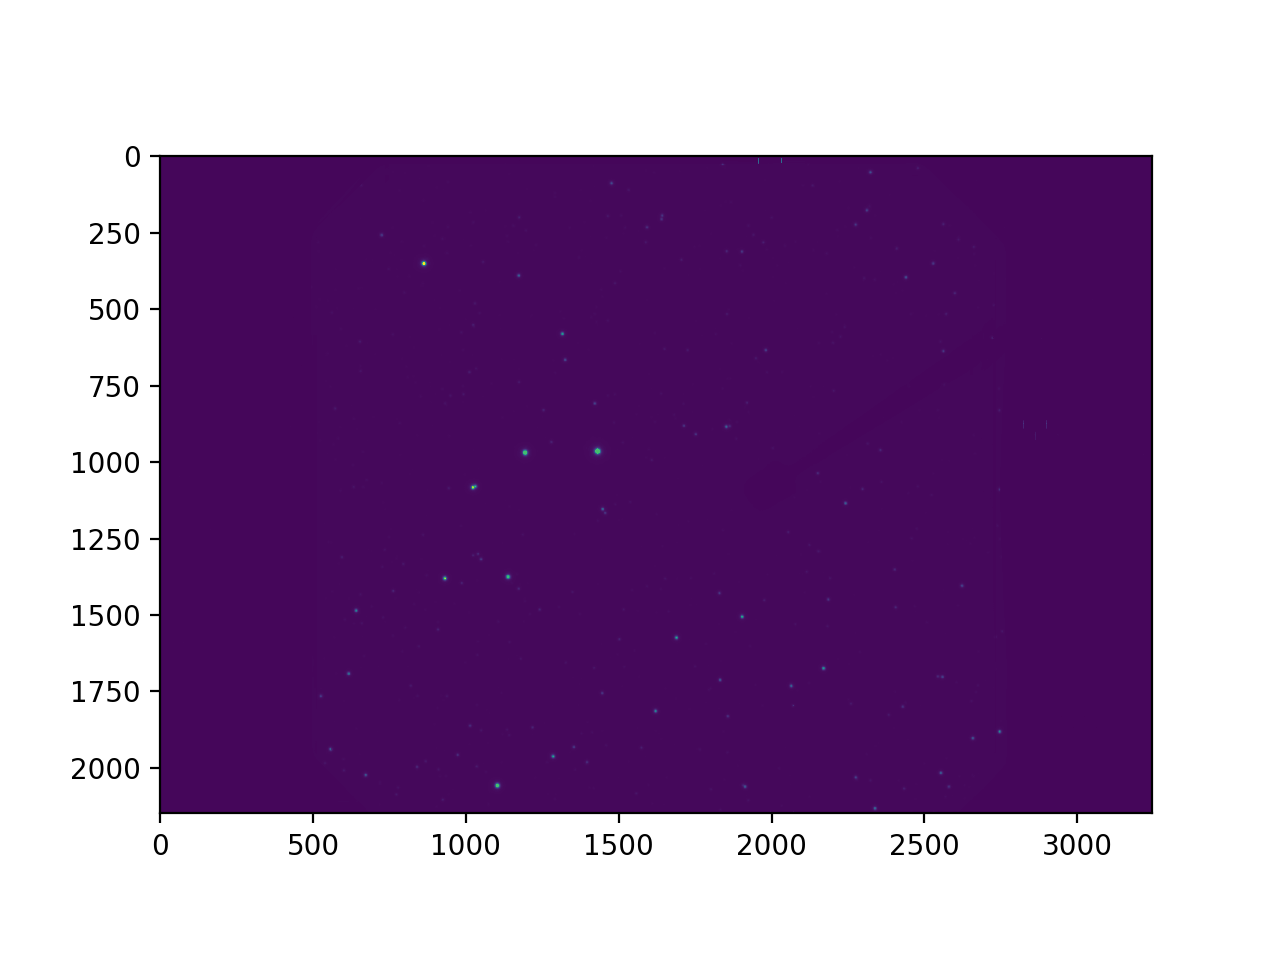

In [11]:
%matplotlib notebook
from matplotlib import pyplot as plt

fig, ax = plt.subplots(num="My First Image", dpi=100, )
ax.imshow(sci.data)

plt.show()

Let us now change the contrast by setting `vmin` and `vmax` while calling the `imshow` method:

<IPython.core.display.Javascript object>


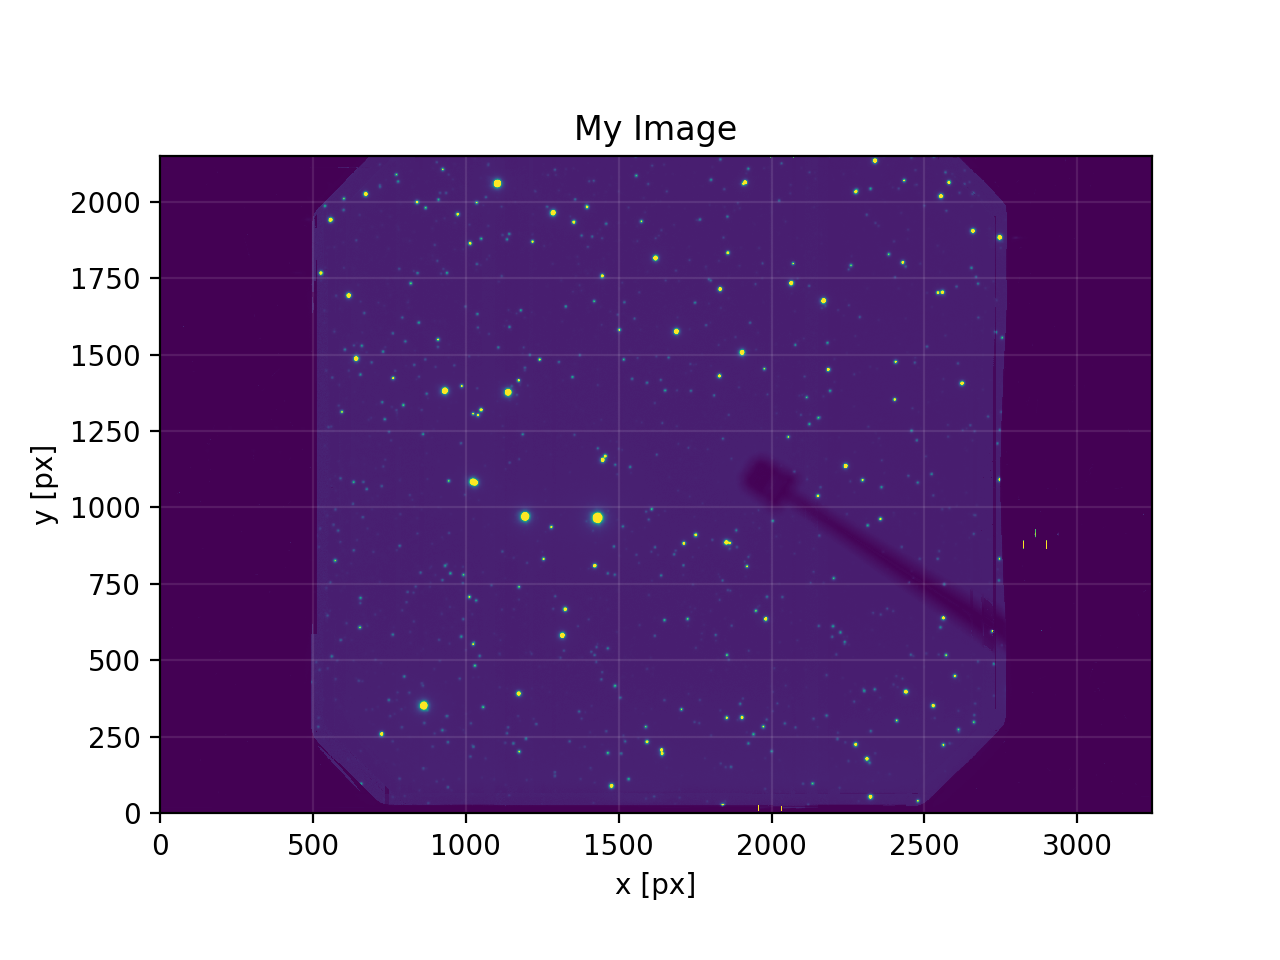

In [12]:
fig, ax = plt.subplots(num="My image with more details")

ax.imshow(sci.data, origin="lower", vmin=1e1, vmax=1e4)

ax.set_xlabel("x [px]")
ax.set_ylabel("y [px]")
ax.set_title("My Image")
ax.grid("-", color="white", alpha=0.1)

plt.show()

### `astropy.visualization`

AstroPy also contains a collection of useful tools for visualization. One of them is called `visualization` and it holds functions and classes that controls the color stretch and the interval of the data displayed. The code below shows how we can use the `ImageNormalize` class together with `ZScaleInterval` and `LinearStretch` classes:

<IPython.core.display.Javascript object>


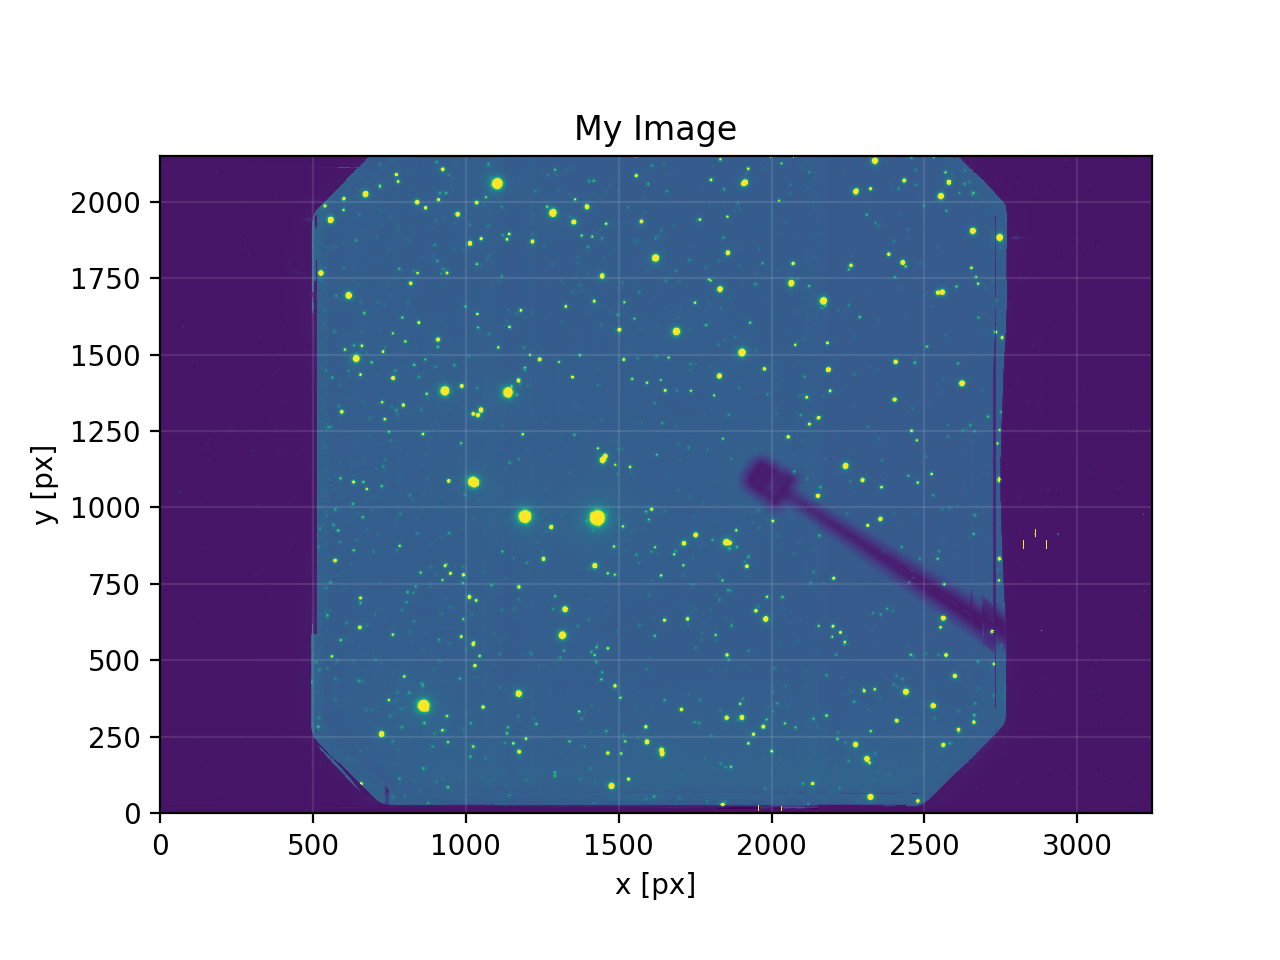

In [13]:
from astropy import visualization as vis 

norm_factor = vis.ImageNormalize(
    sci.data,
    interval=vis.ZScaleInterval(),
    stretch=vis.LinearStretch())

fig, ax = plt.subplots(num="Using Normalization")

ax.imshow(sci.data, origin="lower", norm=norm_factor)

ax.set_xlabel("x [px]")
ax.set_ylabel("y [px]")
ax.set_title("My Image")
ax.grid("-", color="white", alpha=0.1)

plt.show()

### Working with masks and bad data

Now we can use what we discussed in the previous Python Tutorial Series in order to mask the bad pixels. First, we need to import the `copy` function from the `copy` package. Then we will use it to create a copy of a matplotlib colormap and set the color of the bad data to Red:

In [14]:
from copy import copy

colormap = copy(plt.cm.viridis)
colormap.set_bad(color="Red")

Now we retried the Data Quality HDU from our `HDUList`. The DQ contains unsigned integer data with flags on each pixel describing if the data is good (`0`) or bad for any reason (otherwhise).

In [15]:
dq = hdul["DQ"]

Then we create a masked data using the `numpy.ma` package and the `masked_where` function:

In [16]:
import numpy.ma as ma

masked_data = ma.masked_where(dq.data != 0, sci.data) 

Puttig everything together, we have our image displayed normally with the Viridis colormap where the data is good and in Red where the data is bad:

<IPython.core.display.Javascript object>


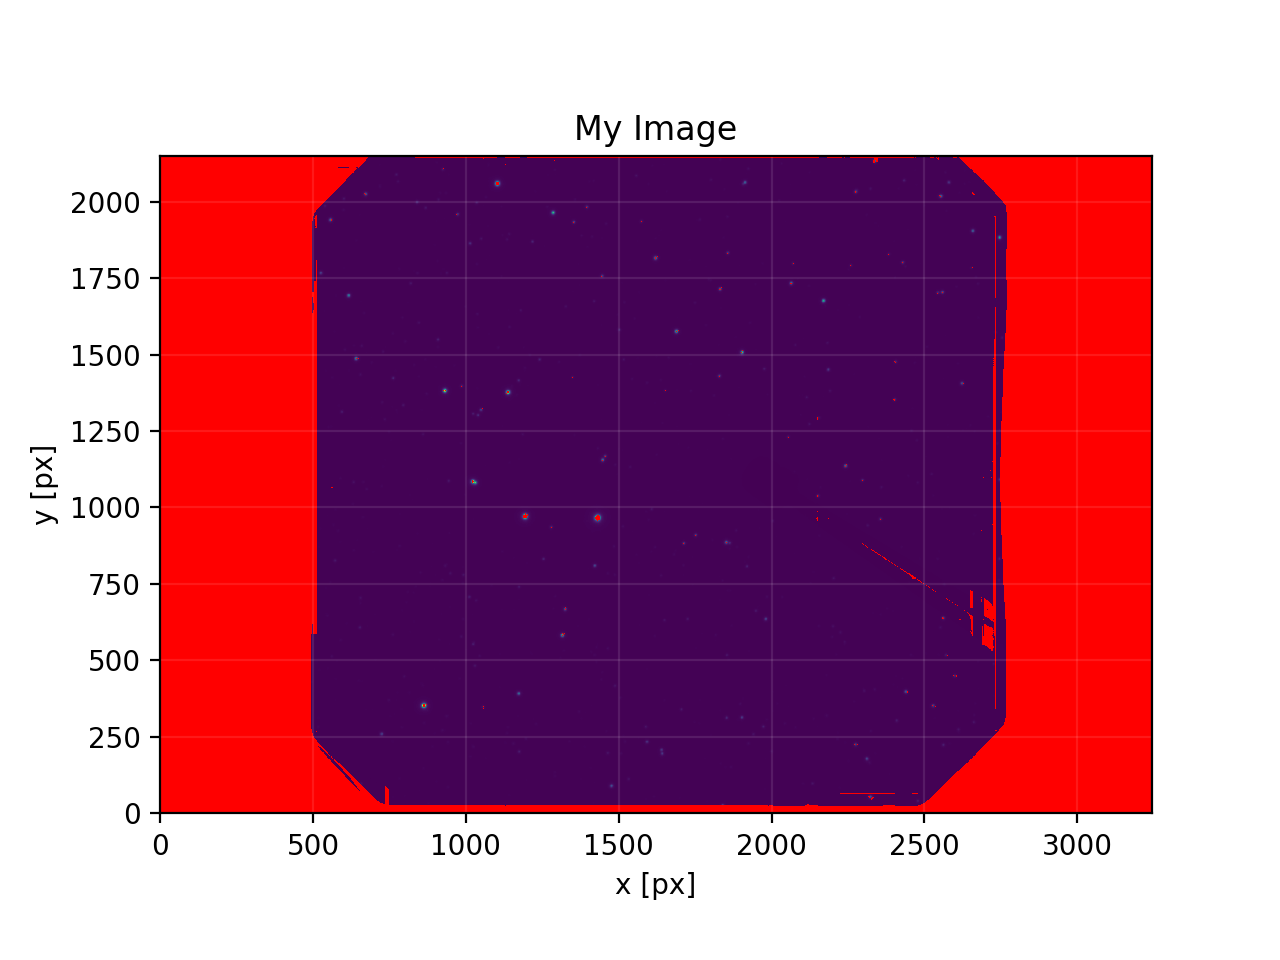

In [17]:
fig, ax = plt.subplots(num="Using a Mask")

ax.imshow(masked_data, origin="lower", cmap=colormap)

ax.set_xlabel("x [px]")
ax.set_ylabel("y [px]")
ax.set_title("My Image")
ax.grid("-", color="white", alpha=0.1)

plt.show()

### Masked data and image normalization

The method above does not work properly if you pass an `ImageNormalization` class to the `norm` argument of the `ax.imshow` function. If you do, the bad pixel mask with not show up. 

Instead, use the `vmin` and `vmax` parameters together with the `norm_factor.vmin`/`norm_factor.vmax` attributes:

<IPython.core.display.Javascript object>


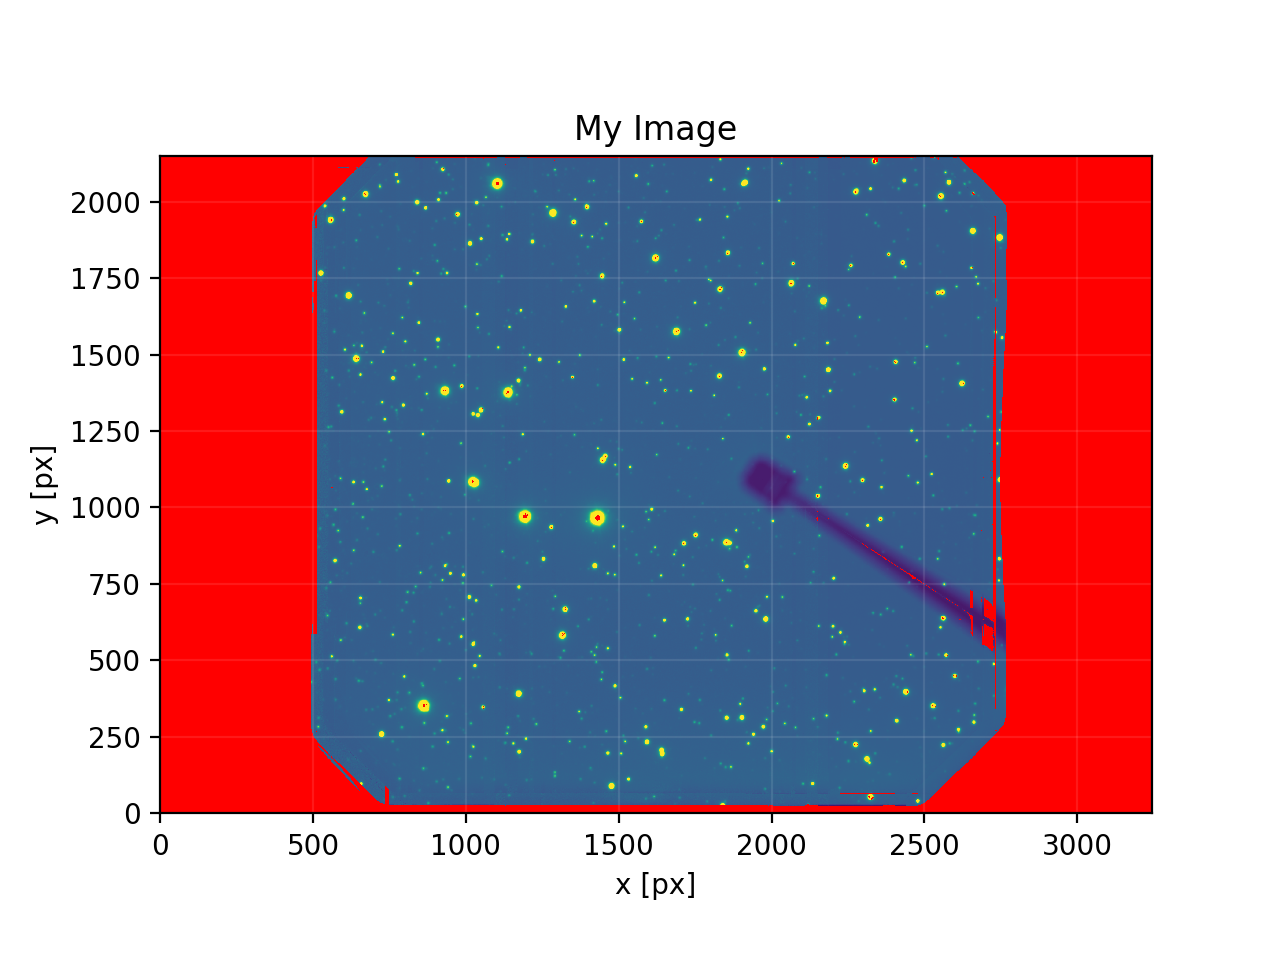

In [19]:
fig, ax = plt.subplots(num="Using a Mask and Normalization")

ax.imshow(masked_data, origin="lower", cmap=colormap, vmin=norm_factor.vmin, 
         vmax=norm_factor.vmax)

ax.set_xlabel("x [px]")
ax.set_ylabel("y [px]")
ax.set_title("My Image")
ax.grid("-", color="white", alpha=0.1)

plt.show()

### Display Images with WCS

<IPython.core.display.Javascript object>


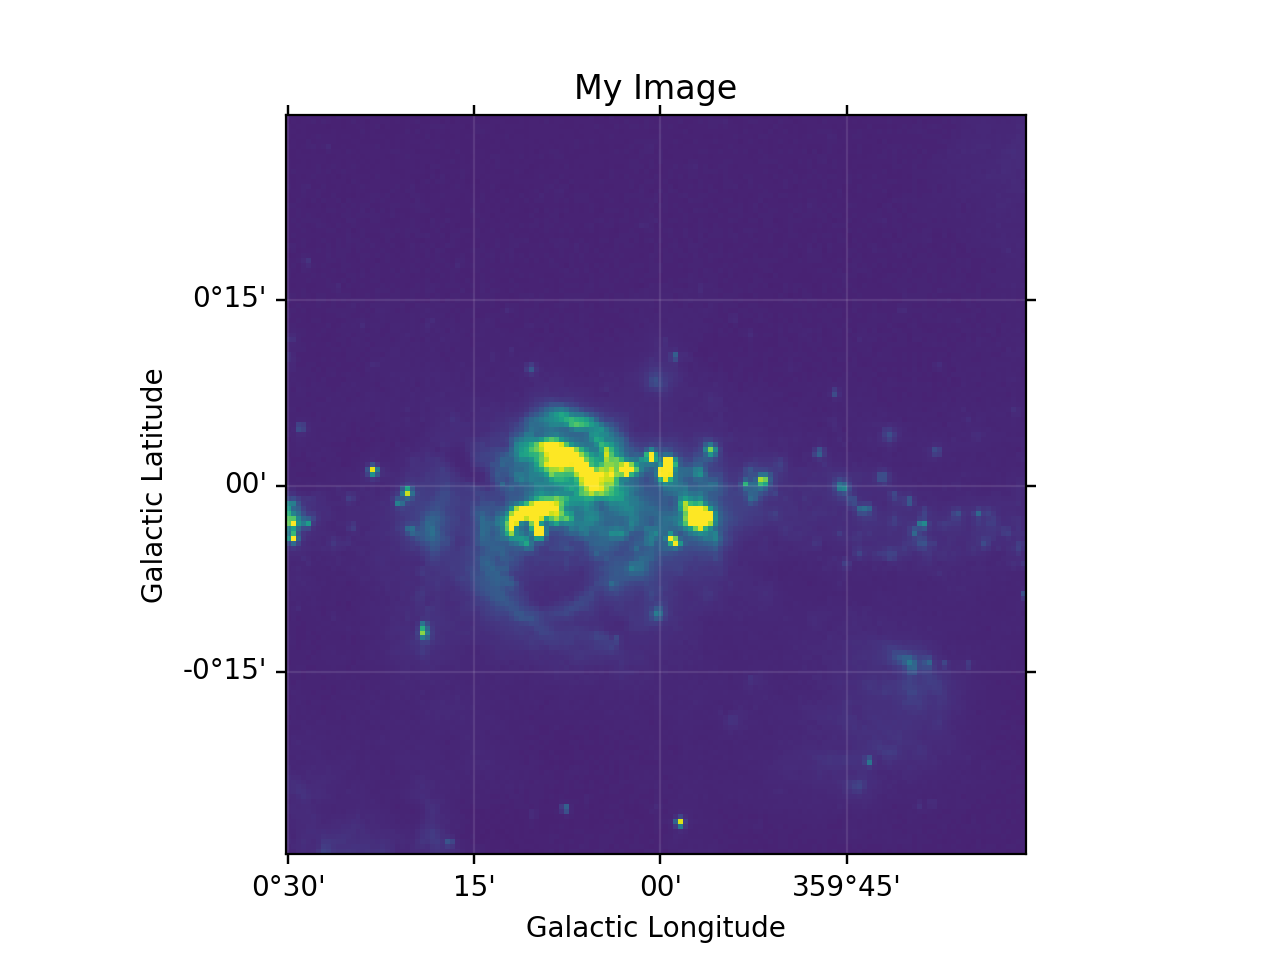

In [20]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename('galactic_center/gc_msx_e.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

fig, ax = plt.subplots(num="Using WCS (2)", subplot_kw={"projection": wcs})
ax.imshow(hdu.data, origin="lower", cmap=colormap, vmin=-2.e-5, vmax=2.e-4,)

ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')
ax.set_title("My Image")
ax.grid("-", color="white", alpha=0.1)

plt.show()

I just found that there is an [AstroPy Issue on GitHub](https://github.com/astropy/astropy/issues/7180) for when the ticks labels do not show. The code below shows how to make the ticks labels appear again with the price of having the axis labels swapped. This was reported and should be updated soon.

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


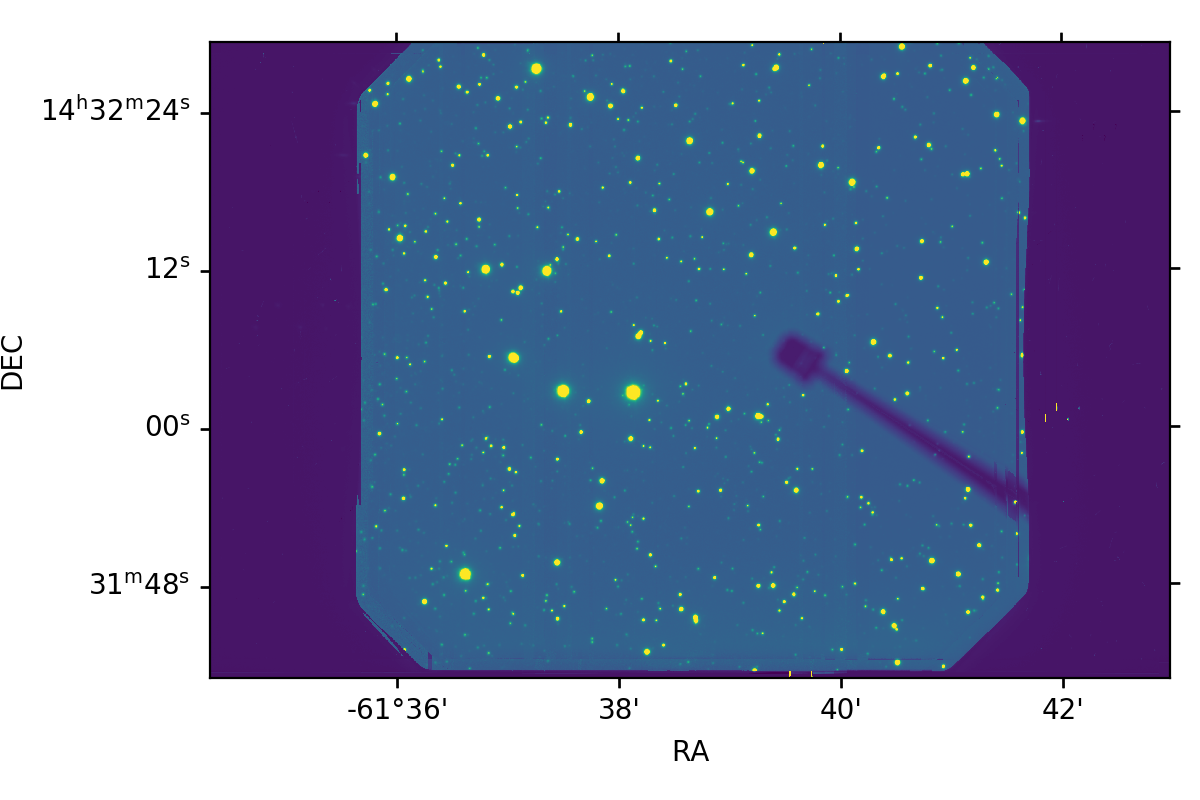

In [144]:
from astropy.wcs import WCS

hdul = fits.open("data/simple_image.fits")

wcs = WCS(hdul[1].header)

fig, ax = plt.subplots(num="Using WCS", subplot_kw={"projection": wcs}, figsize=(6,4))
ax.imshow(hdul[1].data, origin="lower", cmap=colormap, vmin=norm_factor.vmin,
         vmax=norm_factor.vmax)

# Trick to make the labels appear ----------------
ax.coords['ra'].set_ticklabel_position('l')
ax.coords['dec'].set_ticklabel_position('b')

ax.coords['ra'].set_axislabel('RA')
ax.coords['dec'].set_axislabel('DEC')
# ------------------------------------------------

fig.tight_layout(rect=[0.15, 0.1, 1.0, 1.0])
plt.show()
plt.savefig('fig/using_wcs.png')

## imexam

The AstroPy Project also inclused a Pure Python version of our old friend `imexam`. This package is still under heavy development and there are several installing issues. One of the known issues is the incompatibility with some DS9 versions on MacOs. If you have issues related to XPA (the communication protocol used by DS9), try a different version (like `v7.4` for example). 

Plus, the most recent versions of `imexam` only work with Python3. So make sure you install it in a compatible environment. Running it is fairly straigtforward:

In [127]:
import imexam

w = imexam.connect()

Once DS9 opens, you can carry on with the other commands:

In [128]:
w.load_fits("data/simple_image.fits")
w.imexam()


Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /Users/bquint/Repos/Python-Tutorial-Series/Notebooks/data/simple_image.fits


## PhotUtils

Photutils is an associated AstroPy Package to detect sources and to perform photometry on 2D arrays (images). It comes with a set of sample data so you can test the parameters and check its usage. For example: 

In [30]:
from photutils import datasets

hdu = datasets.load_star_image()    
data = hdu.data[0:401, 0:401]    

In the code above, we are simply loading a 400x400 image with random stars. Let's check it out:

<IPython.core.display.Javascript object>


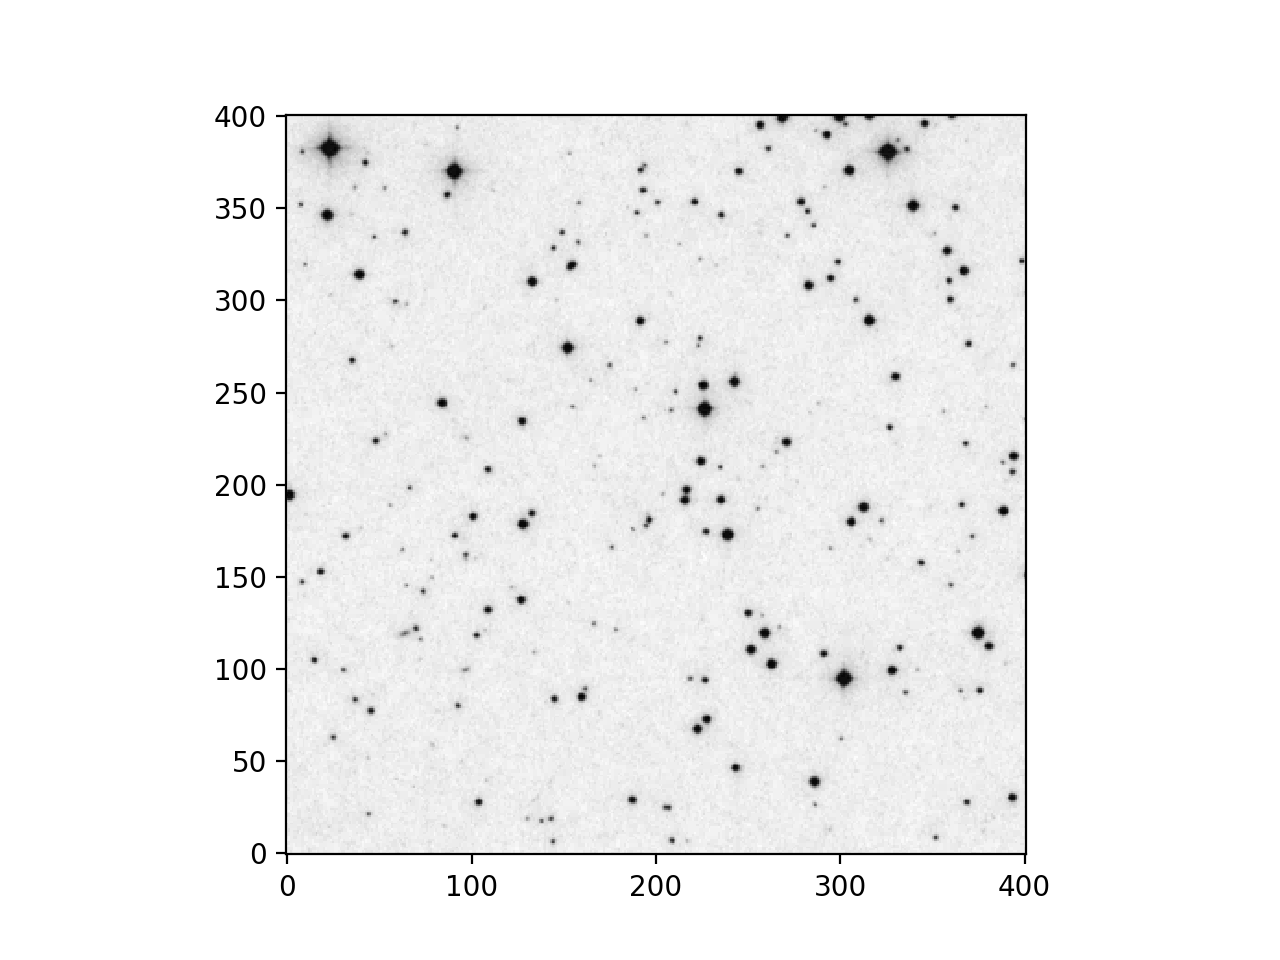

In [31]:
fig, ax = plt.subplots(num="Photutils Dataset #1")
ax.imshow(data, origin="lower", cmap="gray_r")
plt.show()

### Basic Statistics

Now, we can perform some statistics on it:

In [41]:
from astropy.stats import sigma_clipped_stats

mean, median, std = sigma_clipped_stats(data, sigma=3.0)    
print(mean, median, std)

3668.09661145823 3649.0 204.41388592022315


Here we are getting some statistical results using sigma clipped data with a threshold of three sigma. That should exclude brighter sources, cosmic rays, etc. The standard deviation is used as a threshold to `DAOStarFinder` and the median is one of estimative of the background level, which needs to be subtracted in order to perform source detection. 

### Detect Sources with DAOStarFinder

The code below shows how these two variables are used to create  a table with the detected sources:

In [42]:
from photutils import DAOStarFinder

daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)    
sources = daofind(data - median)    

for col in sources.colnames:    
    sources[col].info.format = '%.8g'  # for consistent table output

print(sources) 

 id xcentroid ycentroid sharpness  ... sky peak    flux       mag     
--- --------- --------- ---------- ... --- ---- --------- ------------
  1 144.24757 6.3797904 0.58156257 ...   0 6903 5.6976747   -1.8892441
  2 208.66907 6.8205805 0.48348966 ...   0 7896 6.7186388   -2.0682032
  3 216.92614 6.5775933 0.69359525 ...   0 2195 1.6662764  -0.55436758
  4 351.62519 8.5459013 0.48577834 ...   0 6977 5.8970385   -1.9265849
  5 377.51991 12.065501 0.52038488 ...   0 1260 1.1178252  -0.12093477
  6 294.27284 12.737191 0.68021892 ...   0 2059 1.4809613  -0.42635928
  7 85.217728 14.710347 0.62394134 ...   0 1458 1.2457081  -0.23854075
  8 137.94129 17.464718 0.54340548 ...   0 5451 4.6833069   -1.6763815
  9 130.32797 18.678087 0.62723987 ...   0 3432 2.8641222   -1.1424789
 10  143.1105 18.623553 0.52124876 ...   0 6722 5.7556336   -1.9002329
...       ...       ...        ... ... ...  ...       ...          ...
276 292.58712 389.31304  0.3548582 ...   0 9231   4.64095   -1.6665172
277  9

We can also use the `CircularAperture` class to display what where the identified sources overlayed with the actual image:

<IPython.core.display.Javascript object>


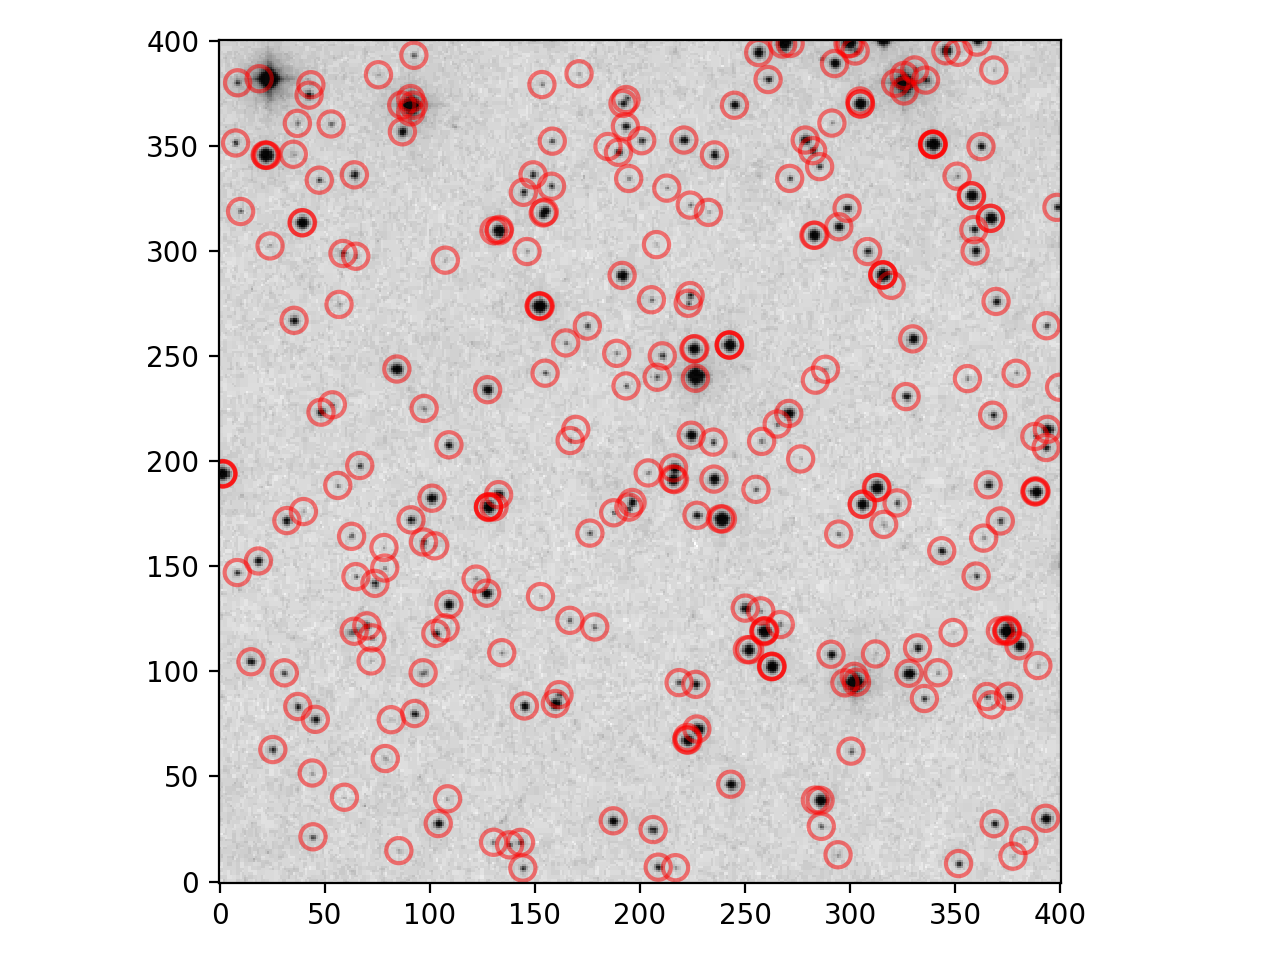

In [43]:
from photutils import CircularAperture

norm = vis.ImageNormalize(stretch=vis.SqrtStretch())
fig, ax = plt.subplots(num="Circular apertures")
ax.imshow(data, cmap='Greys', origin='lower', norm=norm)

positions = zip(sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=6.)
apertures.plot(color='red', lw=1.5, alpha=0.5, axes=ax)

plt.show()

plt.tight_layout()
plt.savefig('fig/circular_apertures.png')

### Detect Sources with IRAFStarFinder

If, instead, you prefer to use the `IrafStarFinder` you can simply write:

In [44]:
from photutils import IRAFStarFinder

iraffind = IRAFStarFinder(fwhm=3.0, threshold=5.*std)    
iraf_src = iraffind(data - median)    

Now let's display the sources identified using the two methods for comparison:

<IPython.core.display.Javascript object>


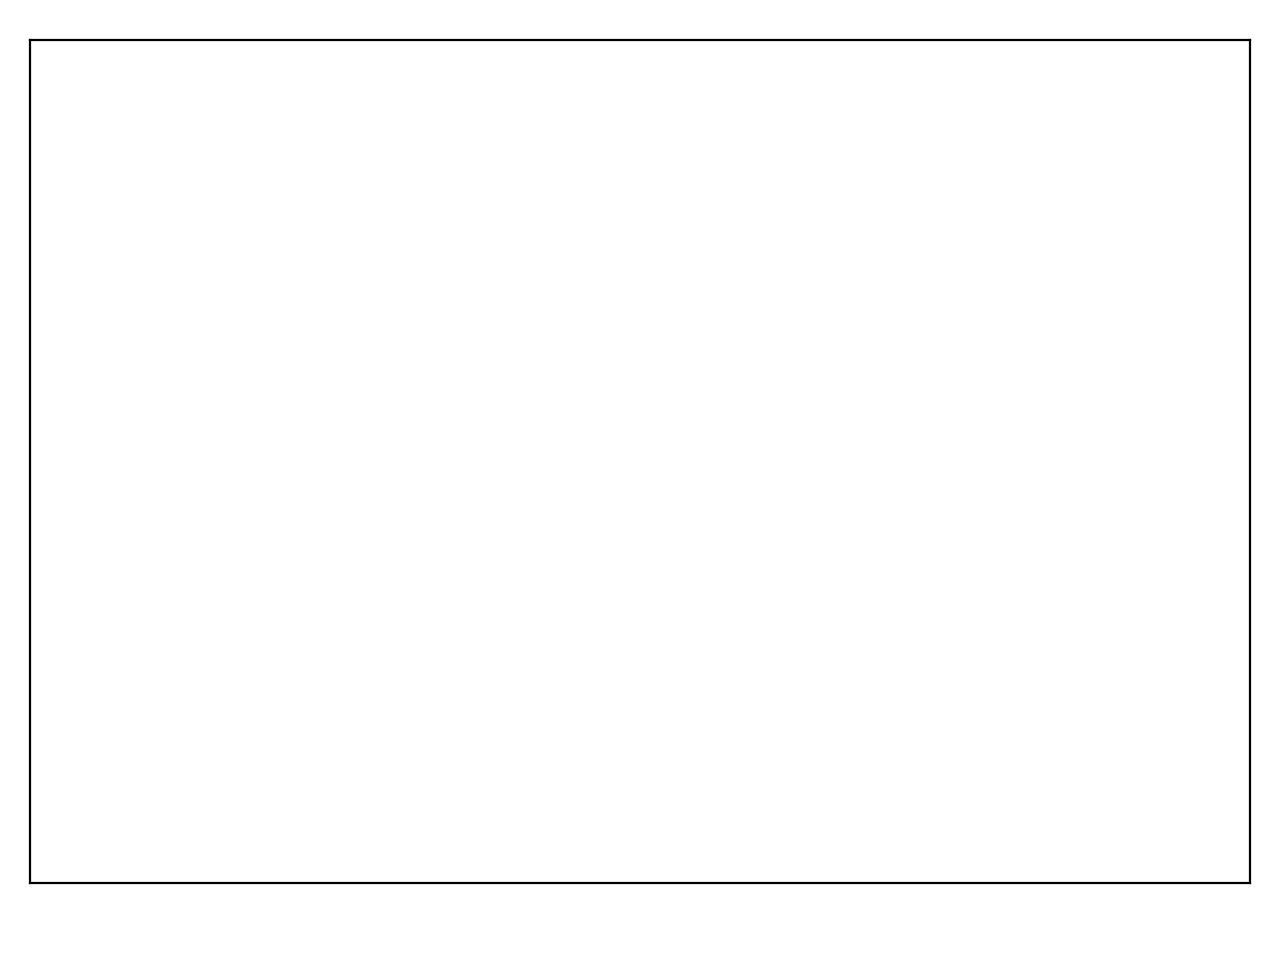

In [45]:
fig, ax = plt.subplots(num="DAOStarFinder Vs IRAFStarFinder")

norm = vis.ImageNormalize(stretch=vis.SqrtStretch())
ax.imshow(data, cmap='Greys', origin='lower', norm=norm)

iraf_pos = zip(iraf_src['xcentroid'], iraf_src['ycentroid'])
iraf_apertures = CircularAperture(iraf_pos, r=4.)
iraf_apertures.plot(color='blue', lw=1.5, alpha=0.5, axes=ax)

dao_apertures = apertures
dao_apertures.plot(color='red', lw='1.5', alpha=0.5, axes=ax)

plt.show()
plt.tight_layout()
plt.savefig('fig/dao_vs_iraf.png')

In [121]:
mean, median, std = sigma_clipped_stats(masked_data, sigma=3.0)    
print((mean, median, std))

(871.947, 868.41895, 33.126675)


In [158]:
daofind = DAOStarFinder(fwhm=10.0, threshold=5.*std)    
sources = daofind(masked_data - median, mask=masked_data.mask)    

for col in sources.colnames:    
    sources[col].info.format = '%.8g'  # for consistent table output

print(sources) 

 id  xcentroid ycentroid sharpness  ... sky    peak      flux       mag     
---- --------- --------- ---------- ... --- --------- --------- ------------
   1 1840.3262  26.46992 0.69942719 ...   0 25516.523 360.68873   -6.3928314
   2  1684.591 28.189062 0.58314541 ...   0 145.13037 2.6057119    -1.039816
   3 877.23489  32.25195 0.58884457 ...   0 1244.1997  18.65538   -3.1770102
   4 986.95195 34.444238  0.4200199 ...   0 88.424377 2.5357343   -1.0102594
   5 1417.5636  33.05068 0.47253768 ...   0 444.73938 8.3689276   -2.3066745
   6 1789.3861 37.431897 0.46947651 ...   0 570.68457 9.9725579   -2.4970164
   7 2285.0732 38.155509  0.4602509 ...   0 454.49194 7.5233064   -2.1910219
   8 2478.7466 39.173303 0.49400982 ...   0 11064.871 184.92492   -5.6674886
   9 2180.4065 43.337518 0.23265876 ...   0 53.166748 1.0644644 -0.067827803
  10 1072.6939 44.963714 0.39068035 ...   0 33.287476 1.0711336 -0.074609081
 ...       ...       ...        ... ... ...       ...       ...          ...

<IPython.core.display.Javascript object>


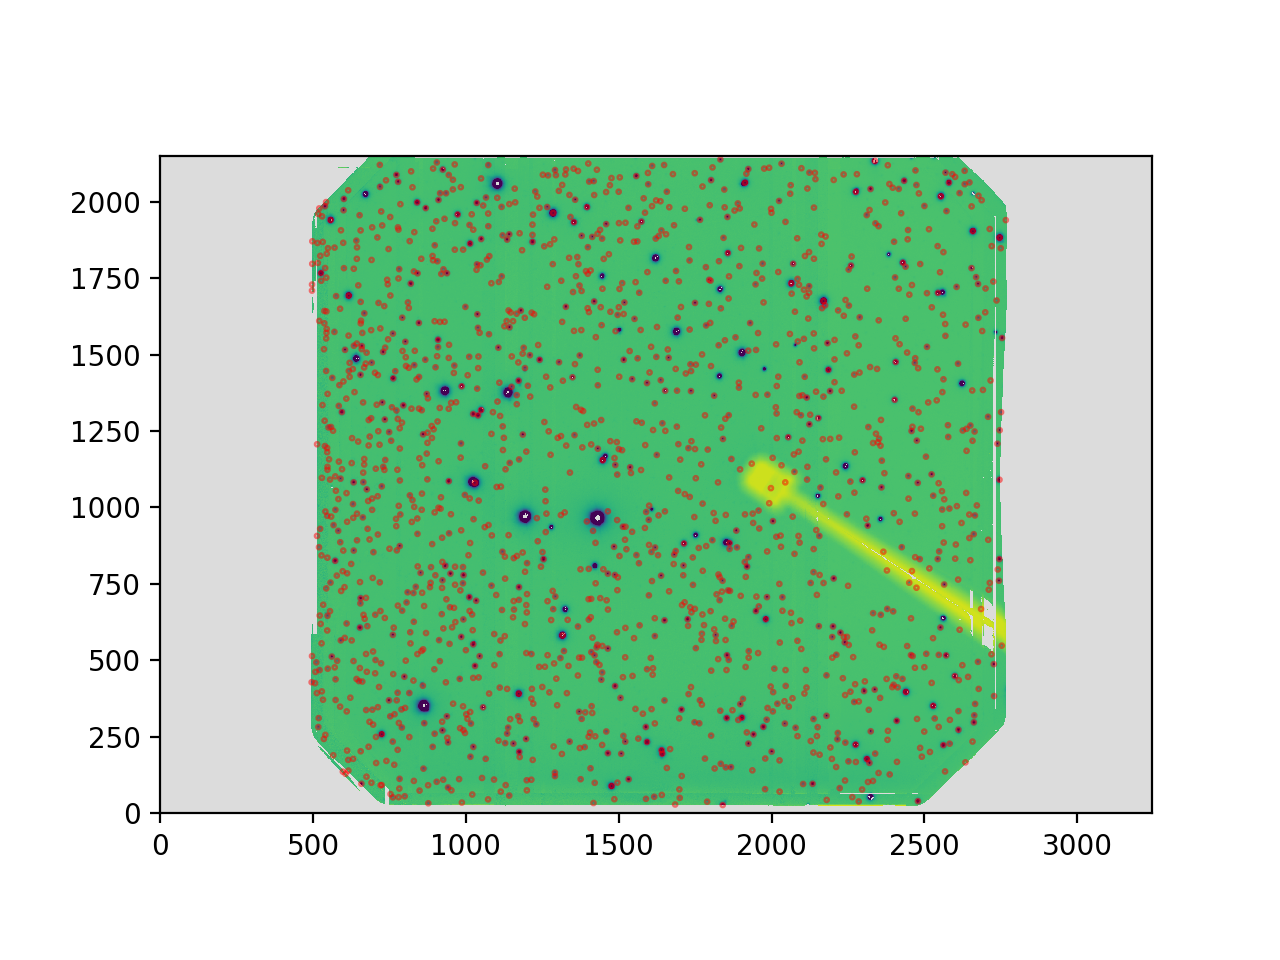

In [159]:
cmap = copy(plt.cm.viridis_r)
cmap.set_bad(color="Gainsboro")

norm = vis.ImageNormalize(masked_data, interval=vis.ZScaleInterval())

positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=4.)

fig, ax = plt.subplots(num="Circular appertures (Real Data)")

ax.imshow(masked_data, cmap=cmap, origin='lower', vmin=norm.vmin, vmax=norm.vmax)

apertures.plot(color='red', lw=1.5, alpha=0.5, ax=ax)

plt.show()

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])